<a href="https://colab.research.google.com/github/nour-said/House_price_prediction/blob/main/HousePrice_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/housePrice.csv')
print(df)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     Area  Room  Parking  Warehouse  Elevator             Address  \
0      63     1     True       True      True             Shahran   
1      60     1     True       True      True             Shahran   
2      79     2     True       True      True              Pardis   
3      95     2     True       True      True       Shahrake Qods   
4     123     2     True       True      True      Shahrake Gharb   
...   ...   ...      ...        ...       ...                 ...   
3474   86     2     True       True      True  Southern Janatabad   
3475   83     2     True       True      True            Niavaran   
3476   75     2    False      False     False              Parand   
3477  105     2     True       True      True              Dorous   
3478   82     2    False       True      True              Parand   

             Price  Price(USD)  
0     1.8

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [ ]:
df["Area"] = df["Area"].astype("str").replace('\D', '', regex=True).astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   int64  
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(2), object(1)
memory usage: 146.2+ KB


In [ ]:
df.isnull().sum()


Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()


Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

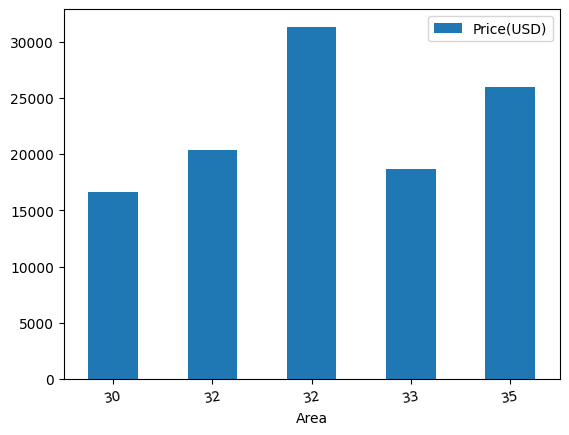

In [ ]:
top_10 = df.sort_values(by="Area", ascending=True).head()
top_10.plot(x="Area", y='Price(USD)',  kind="bar", rot=10)
plt.show()


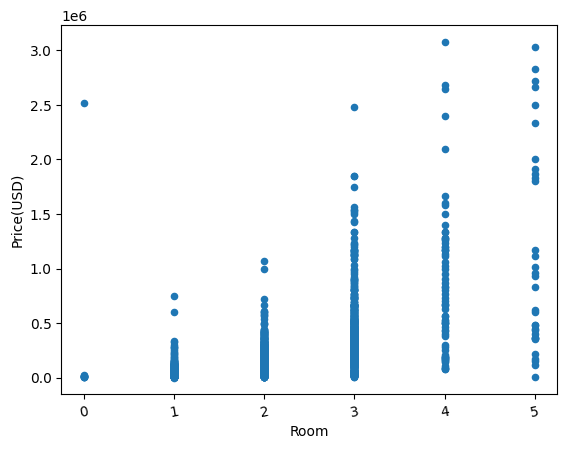

In [ ]:
# top_10= df.sort_values(by="Area", ascending=True).hea
df.plot(x= 'Room', y='Price(USD)',  kind="scatter", rot=10)
plt.show()


In [ ]:
df = df[df.columns].replace({ True :1, False :0})
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,1,1,1,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,1,1,1,Niavaran,6.800000e+09,226666.67
3476,75,2,0,0,0,Parand,3.650000e+08,12166.67
3477,105,2,1,1,1,Dorous,5.600000e+09,186666.67


In [ ]:
from sklearn import preprocessing
le_Address = preprocessing.LabelEncoder()
le_Address.fit(df["Address"].unique())
df["Address"] = le_Address.fit_transform(df["Address"])
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,156,1.850000e+09,61666.67
1,60,1,1,1,1,156,1.850000e+09,61666.67
2,79,2,1,1,1,117,5.500000e+08,18333.33
3,95,2,1,1,1,152,9.025000e+08,30083.33
4,123,2,1,1,1,150,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,1,1,1,163,3.500000e+09,116666.67
3475,83,2,1,1,1,105,6.800000e+09,226666.67
3476,75,2,0,0,0,115,3.650000e+08,12166.67
3477,105,2,1,1,1,39,5.600000e+09,186666.67


In [ ]:
X = df.drop(columns = ["Price","Price(USD)"])
y = df["Price(USD)"]

X

,Area,Room,Parking,Warehouse,Elevator,Address
0,63,1,1,1,1,156
1,60,1,1,1,1,156
2,79,2,1,1,1,117
3,95,2,1,1,1,152
4,123,2,1,1,1,150
...,...,...,...,...,...,...
3474,86,2,1,1,1,163
3475,83,2,1,1,1,105
3476,75,2,0,0,0,115
3477,105,2,1,1,1,39


In [ ]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, random_state=10)

In [ ]:
rfregr = RandomForestRegressor()
rfregr.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
rf_y_pred = rfregr.predict(X_test)
r2_score(y_test, rf_y_pred)*100

77.6597630176918